In [378]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [379]:
def Ham(N,alpha,theta,kappa):
    def pbc(i):
        if i==(N):
            return(0)
        elif i==-1:
            return(N-1)
        else:
            return(i)
    
    H=np.zeros((N,N),dtype = 'complex')
    for i in range(N):
        H[i,i] = np.longdouble(2*np.cos(2*np.pi*(theta+i*alpha)))
        H[i,pbc(i+1)]= complex(1,0)*np.cos(N*kappa) + complex(0,1)*np.sin(N*kappa)
        H[i,pbc(i-1)]= complex(1,0)*np.cos(N*kappa) - complex(0,1)*np.sin(N*kappa)
    
    return(H.T)

In [384]:
N = 200; 

alpha = np.linspace(0,1-1/N,N)
kappa = np.pi/(2*N)
theta = np.linspace(0,1,10)

v1 = np.empty(len(alpha),).astype(object)

def unionkappa(al):
    v = np.empty((len(theta),)).astype(object)
    for th in range(len(theta)):
        v[th] = np.linalg.eigvalsh(Ham(N,al,theta[th],kappa))
    return reduce(np.union1d,(v))
    
for i in range(len(alpha)):
    v1[i] = unionkappa(alpha[i])


The ratio between the thickness of the scatter plot coordinates vs the figsize matters. 

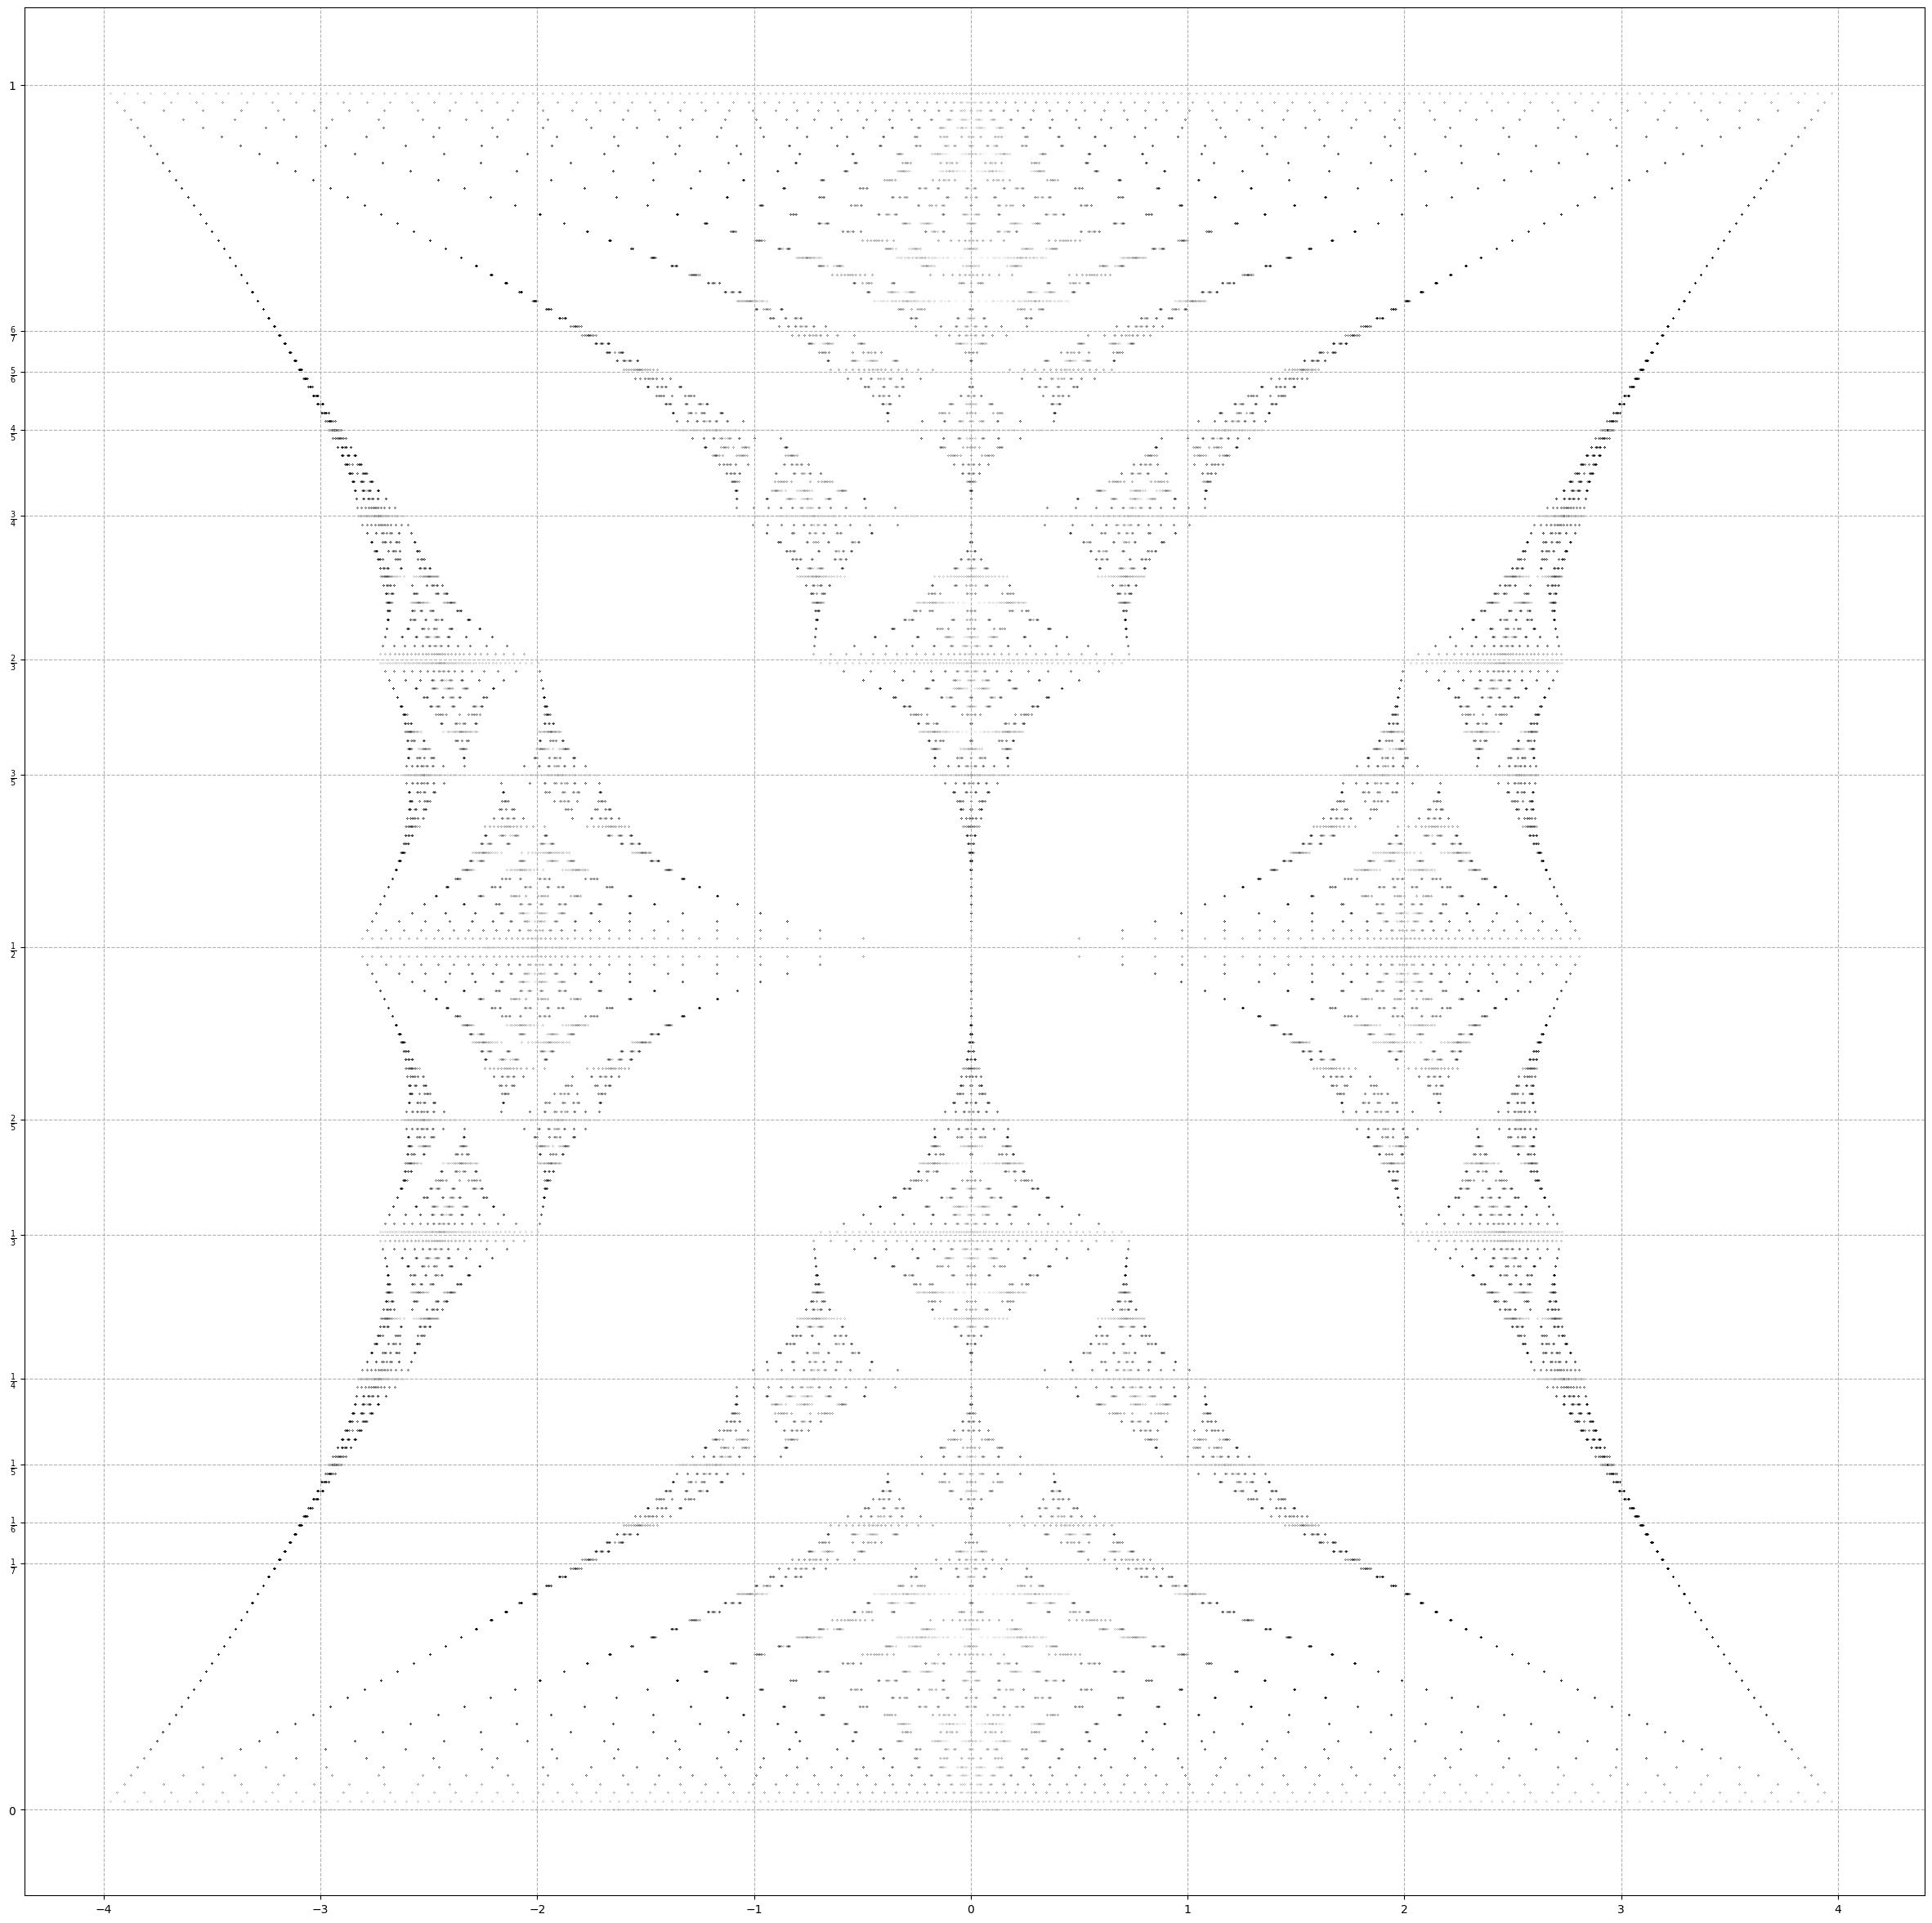

In [385]:
fig , ax = plt.subplots(figsize = (30,30))    

for i in range(len(alpha)):
    o = np.ones(len(v1[i]))
    plt.scatter(v1[i],o*alpha[i],s=0.001,marker='.',color='black')

plt.yticks([0,1/2,1/3,1/4,1/5,1/6,1/7,2/3,3/4,2/5,3/5,4/5,5/6,6/7,1],[r'$0$',r'$\frac{1}{2}$',r'$\frac{1}{3}$',r'$\frac{1}{4}$',r'$\frac{1}{5}$',r'$\frac{1}{6}$',r'$\frac{1}{7}$',r'$\frac{2}{3}$',r'$\frac{3}{4}$',r'$\frac{2}{5}$',r'$\frac{3}{5}$',r'$\frac{4}{5}$',r'$\frac{5}{6}$',r'$\frac{6}{7}$',r'$1$'])

plt.grid(linestyle='--')